# Data Analysis Grades of Portuguese Students
In this file the provided data will be analysed. For this the data are first loaded, then the specific value counts and counts of not known values researched. Finally a correlation matrix will be generated to detect correlations between different columns. On this basis the Bayesian network can be generated and later improved.

## 0. Install required libraries
This section installs all needed libraries in a python virtual environment which can be used as Jupyter kernel. This needs only to be done once.

In [107]:
%%python -m venv ../.env
%%source ../.env/bin/activate
%pip install -r ../requirements.txt

## 1. Import libraries
This section imports all needed libraries and sets the path to the data, number of rows to be displayed.

In [108]:
%reset -f

import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Set matplotlib options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Set pandas options
pd.set_option('display.max_columns', 500)

# Constants
DATA_PATH = "../data/"
DOC_PATH = "../doc/"

## 2. Load data
Firstly, the data needs to be loaded. This is done by using the pandas library, with the read_csv function. The data is then displayed and stored in a dataframe.

In [109]:
original_data = pd.read_csv(DATA_PATH + "student-por_2.csv", sep=";")
original_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Unnamed: 33
0,MS,M,16,R,GT3,T,1,1,at_home,other,other,father,2,1,0,no,no,no,yes,yes,yes,no,no,3,4,4,3,4,5,6,11,11,11,"0,581558765"
1,MS,F,18,R,GT3,T,2,2,other,other,other,mother,2,1,1,no,no,no,no,yes,no,yes,yes,5,5,5,1,1,3,0,8,6,0,"0,677773943"
2,MS,M,17,R,GT3,T,1,1,other,services,course,mother,2,1,0,no,yes,no,yes,no,yes,yes,yes,4,5,5,1,3,2,0,10,9,10,"0,58860641"
3,GP,M,18,U,LE3,T,1,1,other,other,course,mother,1,1,2,no,no,no,no,yes,no,yes,yes,2,3,5,2,5,4,0,11,9,0,"0,627079796"
4,GP,F,18,U,GT3,T,2,1,other,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,yes,4,2,5,1,2,1,8,14,14,15,"0,459968853"


As can be seen, the data contains not only numerical values, but also categorical values. These categorical values need to be encoded, so that they can be used in the Bayesian network. But first, the data needs to be analysed more in detail. Therefore, the information about the data with columns, non-null values and data types is displayed. As a reminder, the data contains out of 33 columns, with 599 entries. The columns are described in the following table.

In [110]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school       599 non-null    object
 1   sex          599 non-null    object
 2   age          599 non-null    int64 
 3   address      599 non-null    object
 4   famsize      599 non-null    object
 5   Pstatus      599 non-null    object
 6   Medu         599 non-null    int64 
 7   Fedu         599 non-null    int64 
 8   Mjob         599 non-null    object
 9   Fjob         599 non-null    object
 10  reason       599 non-null    object
 11  guardian     599 non-null    object
 12  traveltime   599 non-null    int64 
 13  studytime    599 non-null    int64 
 14  failures     599 non-null    int64 
 15  schoolsup    599 non-null    object
 16  famsup       599 non-null    object
 17  paid         599 non-null    object
 18  activities   599 non-null    object
 19  nursery      599 non-null    

Out of the table follows, that there are no not known values, so the data is already clean. But the data types are not perfect because the data contains objects, which are not numerical values. This needs to be changed for the columns: 

- school
- sex
- address
- famsize
- Pstatus
- Mjob
- Fjob
- reason
- guardian
- schoolsup
- famsup
- paid
- activities
- nursery
- higher
- internet
- romantic

Additionally, the column *Unnamed: 33* contains no information about the students and is not part of the data description. Therefore, this column will be dropped.

In [111]:
del original_data['Unnamed: 33']

Furthermore, some of the above columns contain only two values, which can be encoded as binary values. After a closer look into the data description, the following columns are encoded as binary values:

- school
- sex
- address
- Psatus
- schoolsup
- famsup
- paid
- activities
- nursery
- higher
- internet
- romantic

The other columns are encoded as categorical values. The encoding is done by using sklearn's OneHotEncoder. The encoder creates a new column for each value of the categorical column. The value of the new column is 1, if the value of the categorical column is the same as the value of the new column. Otherwise the value is 0. The new columns are added to the dataframe and the categorical columns are dropped. As a result, the dataframe contains only numerical values.

In [112]:
# Binary columns to be converted to 0/1
def binary_to_int(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['school'] = df['school'].map({'GP': 0, 'MS': 1})
    df['sex'] = df['sex'].map({'F': 0, 'M': 1})
    df['address'] = df['address'].map({'U': 0, 'R': 1})
    df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1})
    df['Pstatus'] = df['Pstatus'].map({'T': 0, 'A': 1})
    df['schoolsup'] = df['schoolsup'].map({'yes': 1, 'no': 0})
    df['famsup'] = df['famsup'].map({'yes': 1, 'no': 0})
    df['paid'] = df['paid'].map({'yes': 1, 'no': 0})
    df['activities'] = df['activities'].map({'yes': 1, 'no': 0})
    df['nursery'] = df['nursery'].map({'yes': 1, 'no': 0})
    df['higher'] = df['higher'].map({'yes': 1, 'no': 0})
    df['internet'] = df['internet'].map({'yes': 1, 'no': 0})
    df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})
    
    return df

In [113]:
def convert_columns(df: pd.DataFrame, cols: list) -> pd.DataFrame:
    df = df.copy()
    
    converter = make_column_transformer((OneHotEncoder(), cols), remainder='passthrough', verbose_feature_names_out=False)
    df_conv = converter.fit_transform(df)
    df_conv = pd.DataFrame(df_conv, columns=converter.get_feature_names_out())
    
    return df_conv

In [114]:
clean_data = original_data.copy()
clean_data = binary_to_int(clean_data)

# Categories to be converted to one-hot encoding
cols = [
    'Mjob',
    'Fjob',
    'reason',
    'guardian',
]
# Create the new columns
numerical_data = convert_columns(clean_data, cols)

numerical_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mjob_at_home       599 non-null    float64
 1   Mjob_health        599 non-null    float64
 2   Mjob_other         599 non-null    float64
 3   Mjob_services      599 non-null    float64
 4   Mjob_teacher       599 non-null    float64
 5   Fjob_at_home       599 non-null    float64
 6   Fjob_health        599 non-null    float64
 7   Fjob_other         599 non-null    float64
 8   Fjob_services      599 non-null    float64
 9   Fjob_teacher       599 non-null    float64
 10  reason_course      599 non-null    float64
 11  reason_home        599 non-null    float64
 12  reason_other       599 non-null    float64
 13  reason_reputation  599 non-null    float64
 14  guardian_father    599 non-null    float64
 15  guardian_mother    599 non-null    float64
 16  guardian_other     599 non

### 2.1 Filter outliers
The data must be analyzed for outliers. Outliers can be detected by using the boxplot. The boxplot is a graphical representation of the data. It shows the minimum, maximum, median, first and third quartile. The boxplot for the column *G3* is displayed in the following figure.

In [115]:
def plot_distribution(col: str, end: int, start: int = 0) -> None:
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    numerical_data[col].plot.box()
    plt.title(f"Boxplot of {col}")
    
    plt.subplot(1, 2, 2)
    numerical_data[col].plot.hist(bins=end-start)
    plt.xticks([i for i in range(start, end + 1)], [i for i in range(start, end + 1)])
    plt.title(f"Distribution of {col}")
    plt.show()

    # Value counts
    numerical_data[col].value_counts().sort_index()

#### 2.1.1 Outliers in the Grade columns

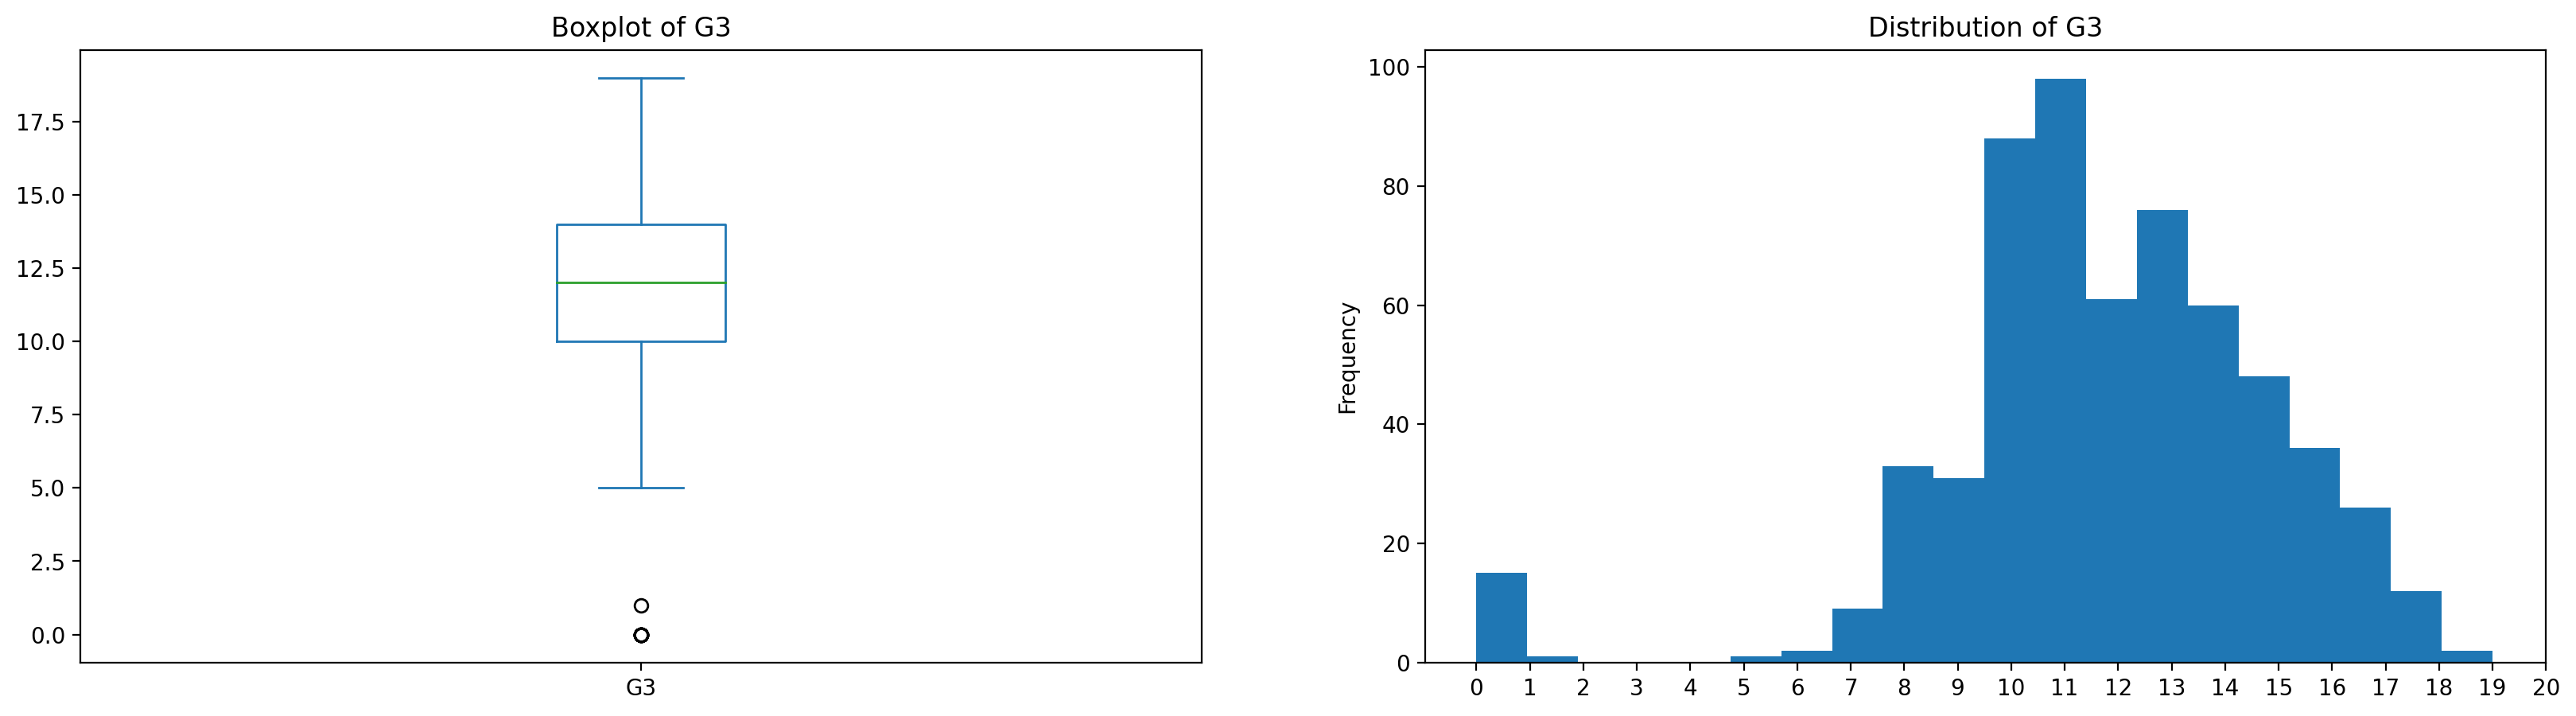

In [116]:
plot_distribution('G3', 20)

As a result of the boxplot, the following outliers are detected:
- 15 Entries with a grade of 0
- 1 Entries with the grade of 1

Looking closer into the reason for the grade of 0 might be interesting. Therefore, the entries with the grade of 0 are displayed.

In [117]:
original_data[original_data['G3'] == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,MS,F,18,R,GT3,T,2,2,other,other,other,mother,2,1,1,no,no,no,no,yes,no,yes,yes,5,5,5,1,1,3,0,8,6,0
3,GP,M,18,U,LE3,T,1,1,other,other,course,mother,1,1,2,no,no,no,no,yes,no,yes,yes,2,3,5,2,5,4,0,11,9,0
54,MS,M,18,R,GT3,T,2,1,other,other,other,mother,2,1,0,no,no,no,yes,no,yes,yes,yes,4,4,3,1,3,5,0,7,7,0
78,MS,M,19,R,GT3,T,1,1,other,services,other,mother,2,1,1,no,no,no,no,yes,yes,no,no,4,3,2,1,3,5,0,5,8,0
112,MS,F,18,R,LE3,A,4,2,teacher,other,reputation,mother,1,2,0,no,no,no,yes,yes,yes,yes,yes,5,3,1,1,1,5,0,5,0,0
187,MS,F,18,R,GT3,T,2,2,at_home,other,course,mother,3,2,1,no,no,no,yes,yes,yes,no,yes,4,3,3,1,1,4,0,9,0,0
219,MS,F,17,U,GT3,T,4,2,teacher,services,home,mother,1,2,0,yes,yes,no,yes,yes,yes,yes,no,5,5,5,1,3,5,0,8,8,0
224,MS,M,16,R,GT3,T,2,1,other,services,reputation,mother,2,2,0,no,no,no,yes,yes,yes,yes,no,5,2,1,1,1,2,0,8,7,0
239,MS,F,19,U,GT3,T,1,1,at_home,services,other,father,2,1,1,no,no,no,no,yes,no,no,no,5,5,5,2,3,2,0,5,0,0
282,MS,F,19,R,GT3,A,1,1,at_home,at_home,course,other,2,2,3,no,yes,no,yes,yes,no,no,yes,3,5,4,1,4,1,0,8,0,0


Additionally, the analysis of the data shows, that the column *G3* has many data for grades between 7 and 18. For the training of the network it is necessary to have a good distribution of the data and values for every possible state. If the state is not represented in the training data the likelihood will be 0. Therefore, the network will not be able to predict values smaller than 7 and bigger than 18. Therefore, the entries with the grades smaller than 7 and bigger than 18 are clustered in smaller than 7 and bigger than 18.

In [118]:
# TODO: Scale for grades

Now we look closer into the distributions of *G1* and *G2* if there are also outliers and if the distribution is similar to the distribution of *G3*.

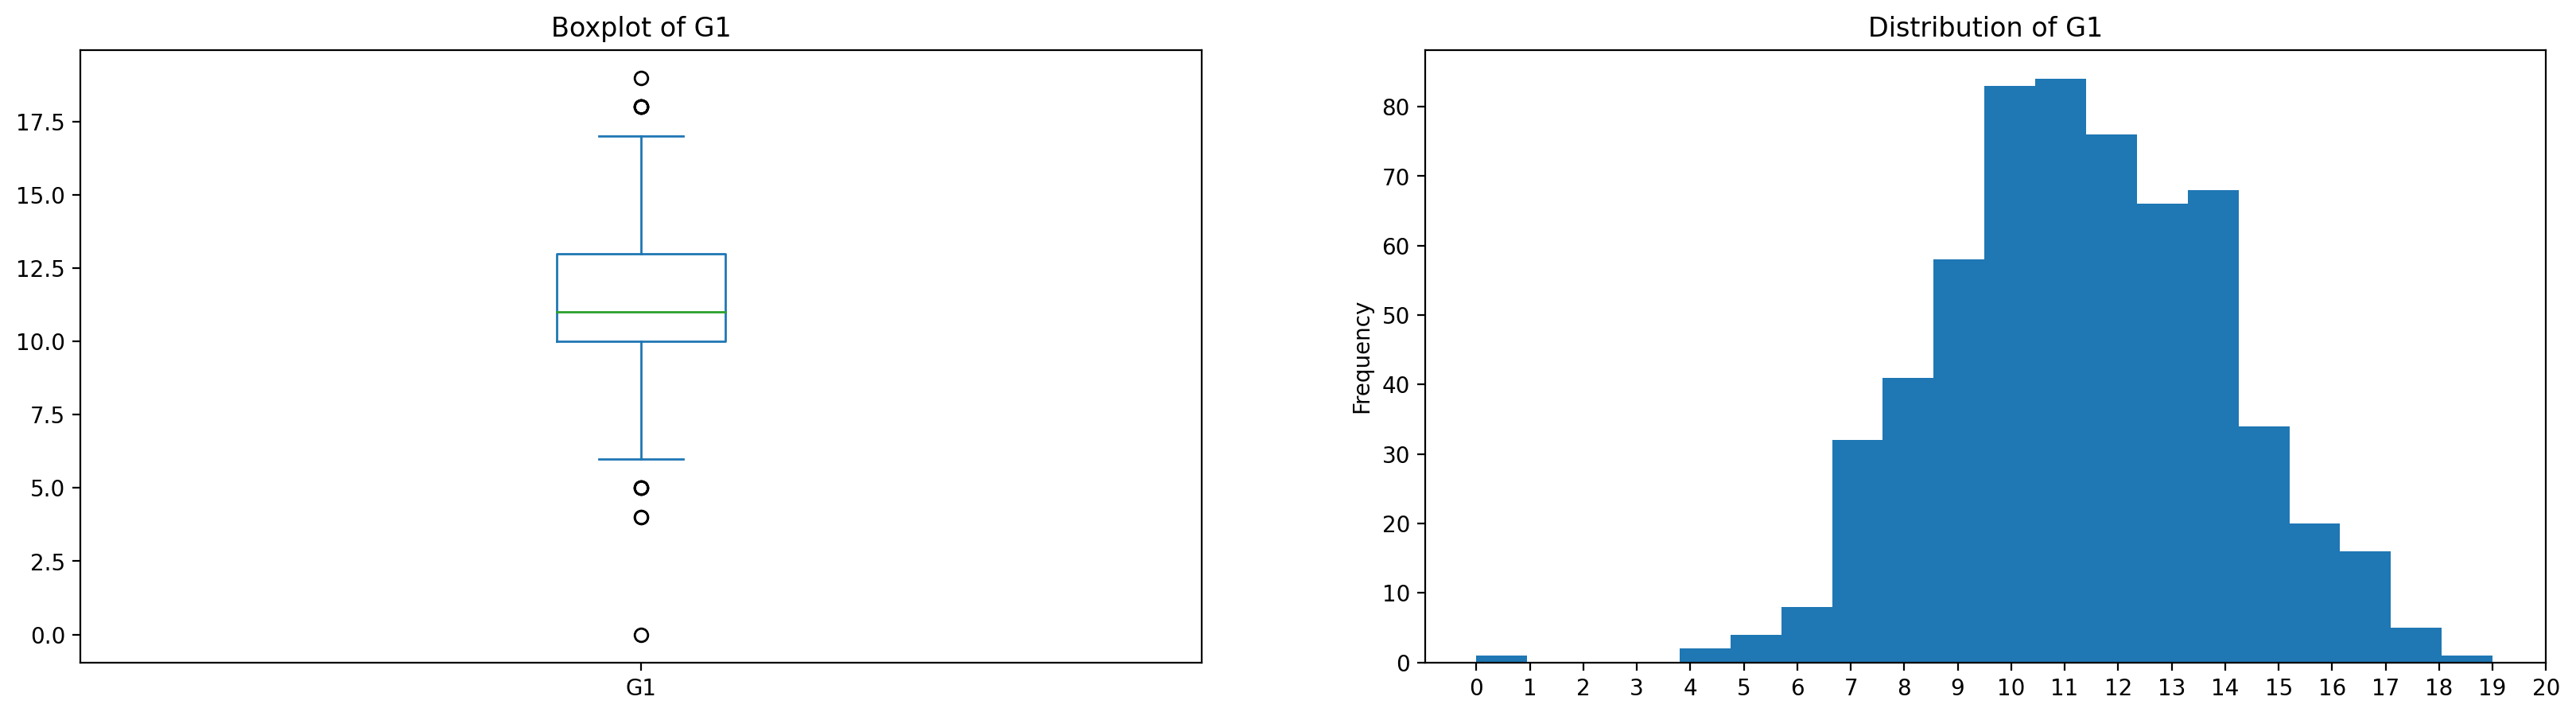

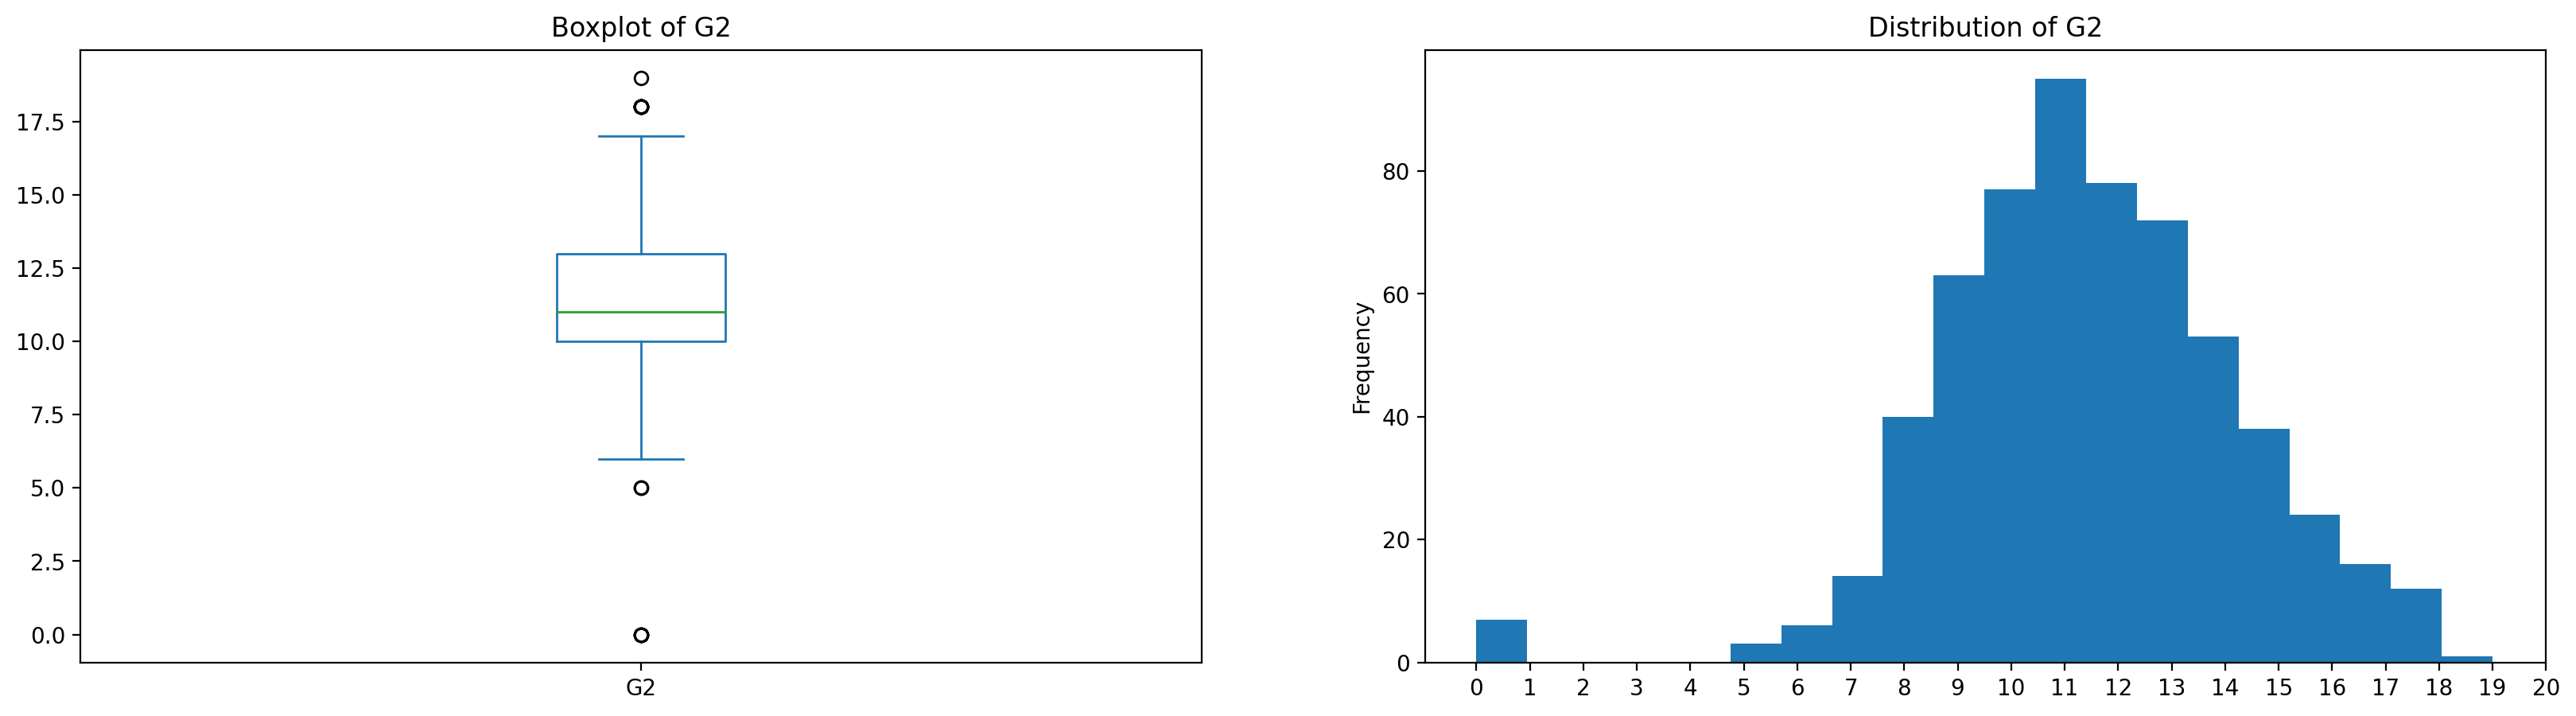

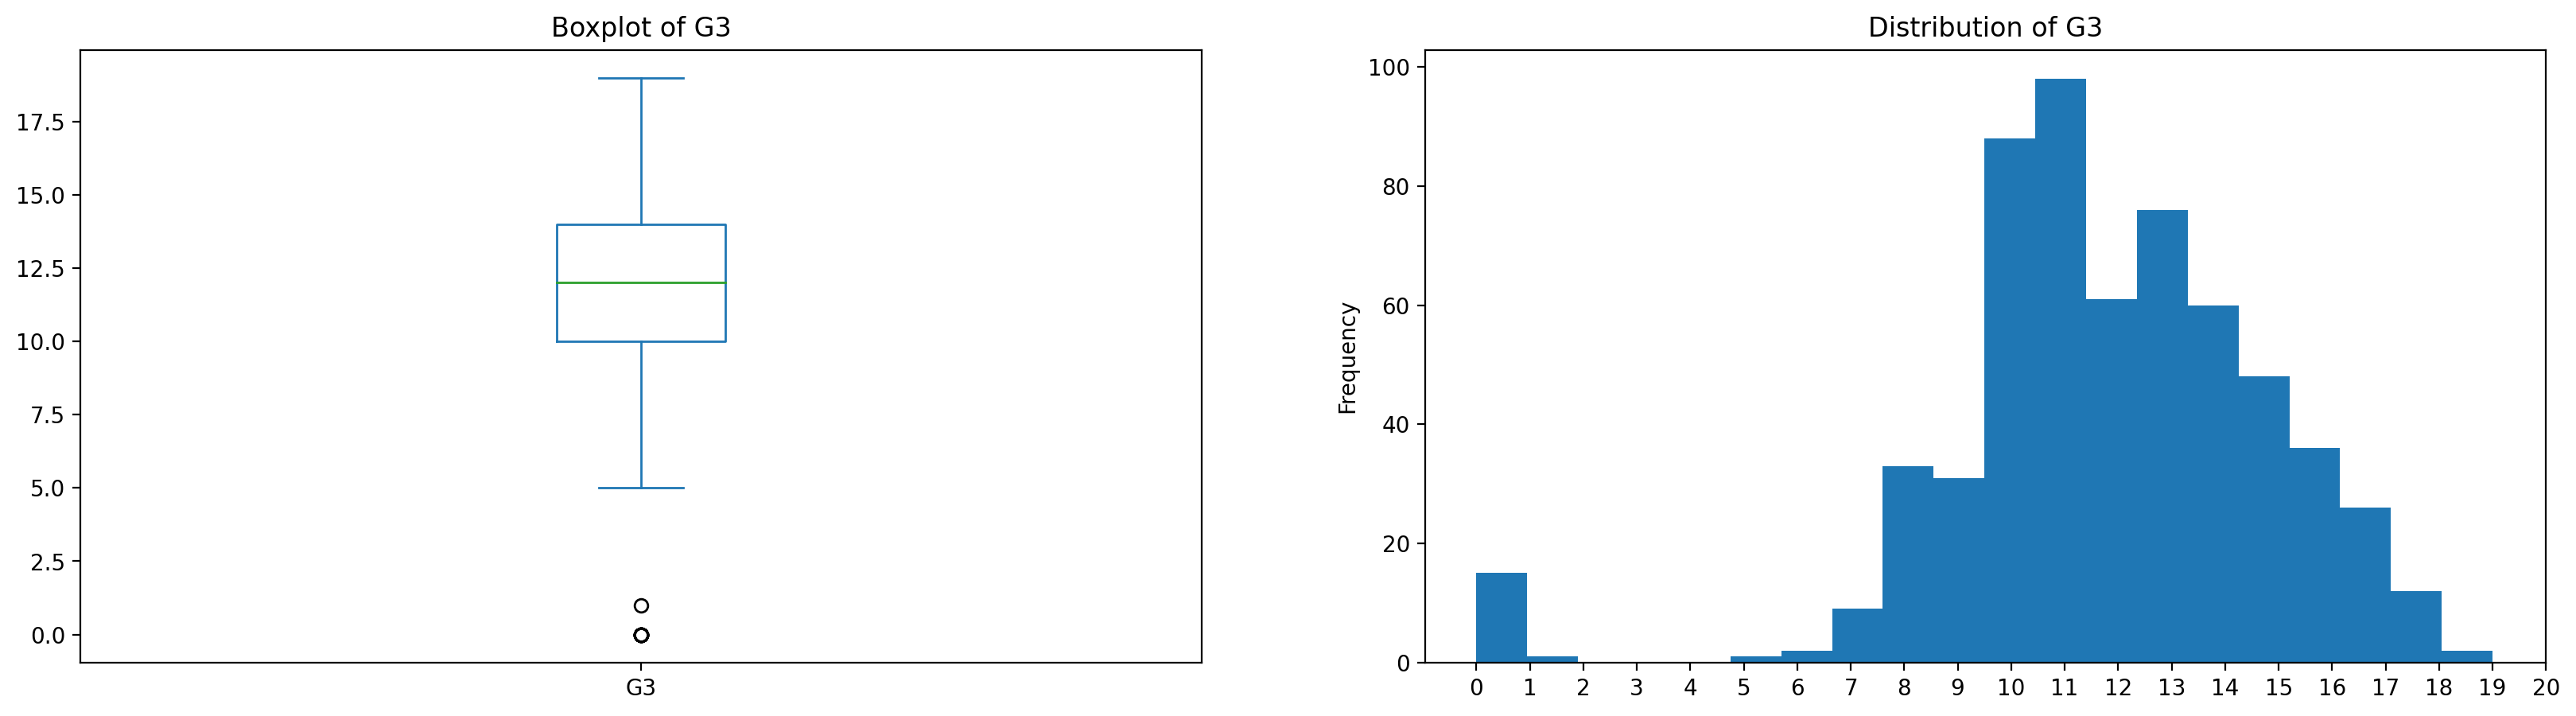

In [119]:
plot_distribution('G1', 20)
plot_distribution('G2', 20)
plot_distribution('G3', 20)

As it can be seen all three distributions are nearly similar. Therefore, the outliers in *G1* and *G2* are also clustered in smaller than 7 and bigger than 18, so we can define the new scales for the grades.

In [120]:
def grade_scale(grade: int) -> int:
    if grade < 7:
        return 0
    elif grade >= 7 and grade <= 17:
        return grade - 6
    elif grade < 17:
        return 12
    
def grade_scale_df(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['G1'] = df['G1'].apply(grade_scale)
    df['G2'] = df['G2'].apply(grade_scale)
    df['G3'] = df['G3'].apply(grade_scale)
    
    return df

def map_grade(grade: int) -> str:
    if grade == 0:
        return '<7'
    elif grade >= 1 and grade <= 11:
        return f'{grade + 6}'
    elif grade == 12:
        return '>17'

In [121]:
df_grade = grade_scale_df(clean_data)

# Map backwars
example_df = df_grade.copy()
example_df['G1'] =  example_df['G1'].apply(map_grade)
example_df['G2'] =  example_df['G2'].apply(map_grade)
example_df['G3'] =  example_df['G3'].apply(map_grade)
example_df[['G1', 'G2', 'G3']].head(12)

,G1,G2,G3
0,11.0,11.0,11.0
1,8.0,<7,<7
2,10.0,9.0,10.0
3,11.0,9.0,<7
4,14.0,14.0,15.0
5,13.0,13.0,14.0
6,13.0,14.0,15.0
7,9.0,10.0,10.0
8,12.0,13.0,14.0
9,11.0,12.0,13.0


#### 2.1.2 Other scales
Now we look closer into the distribution of the age and absences, because they have also a big scale.

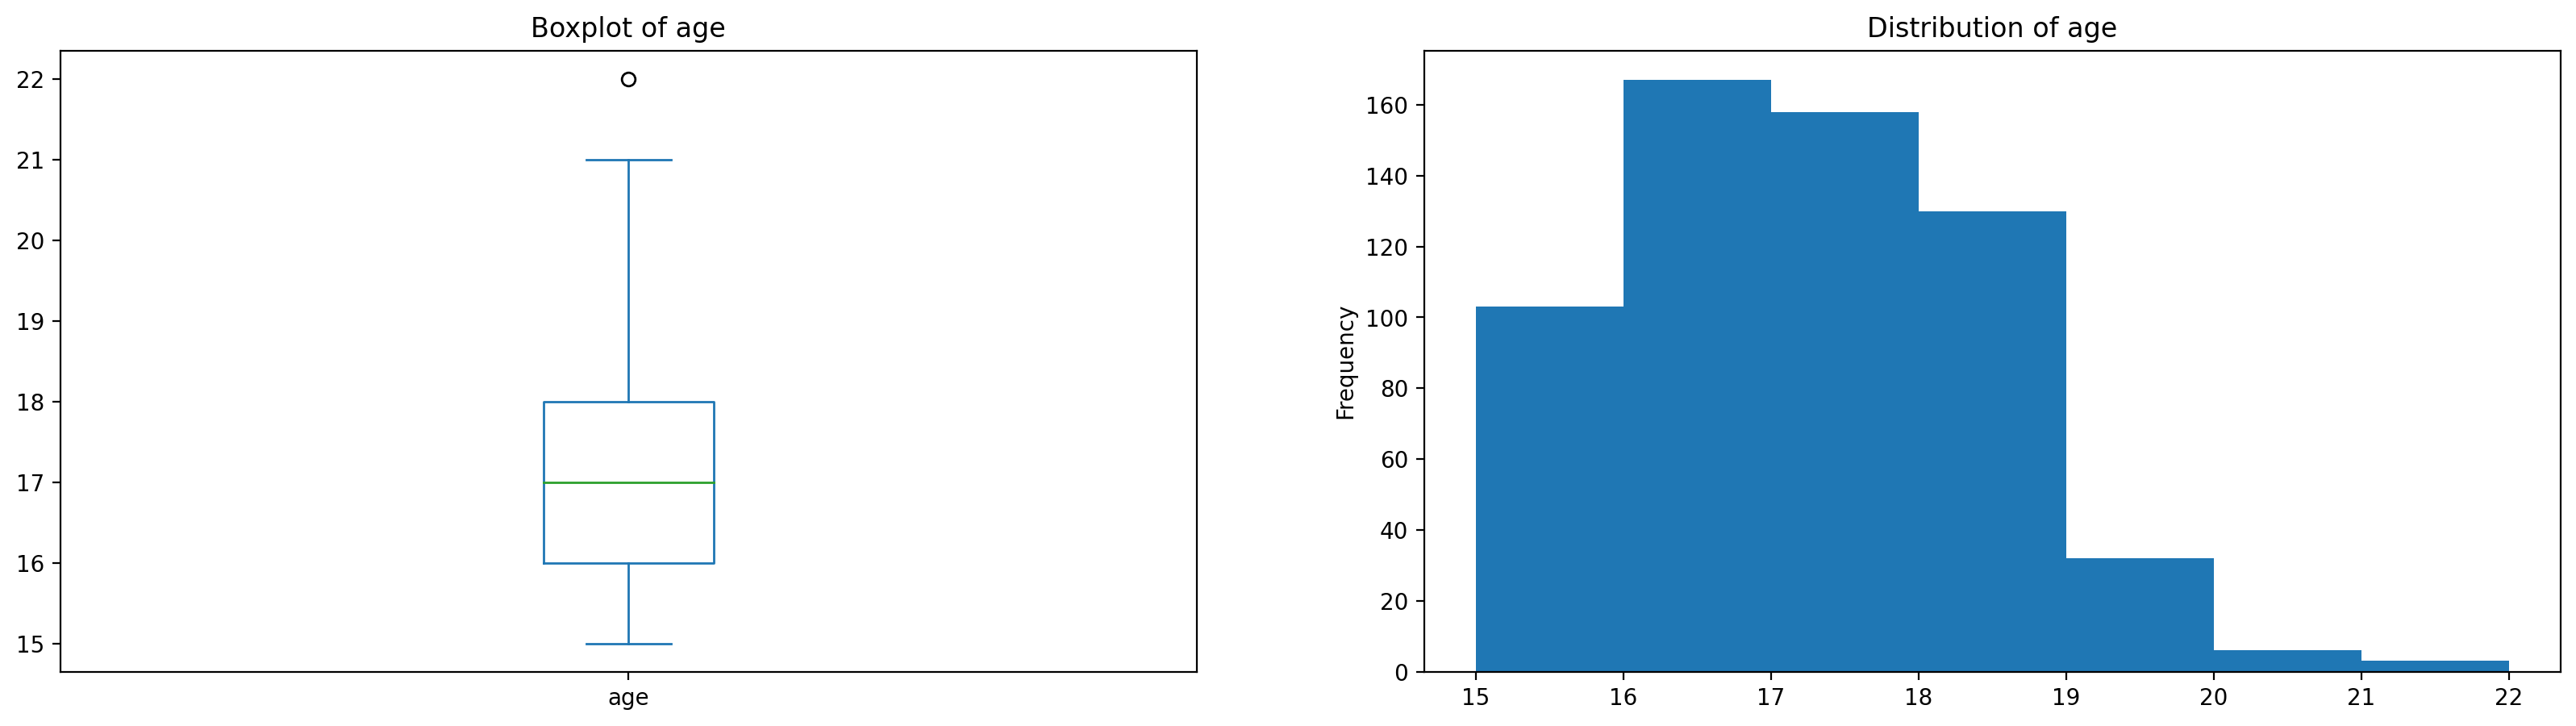

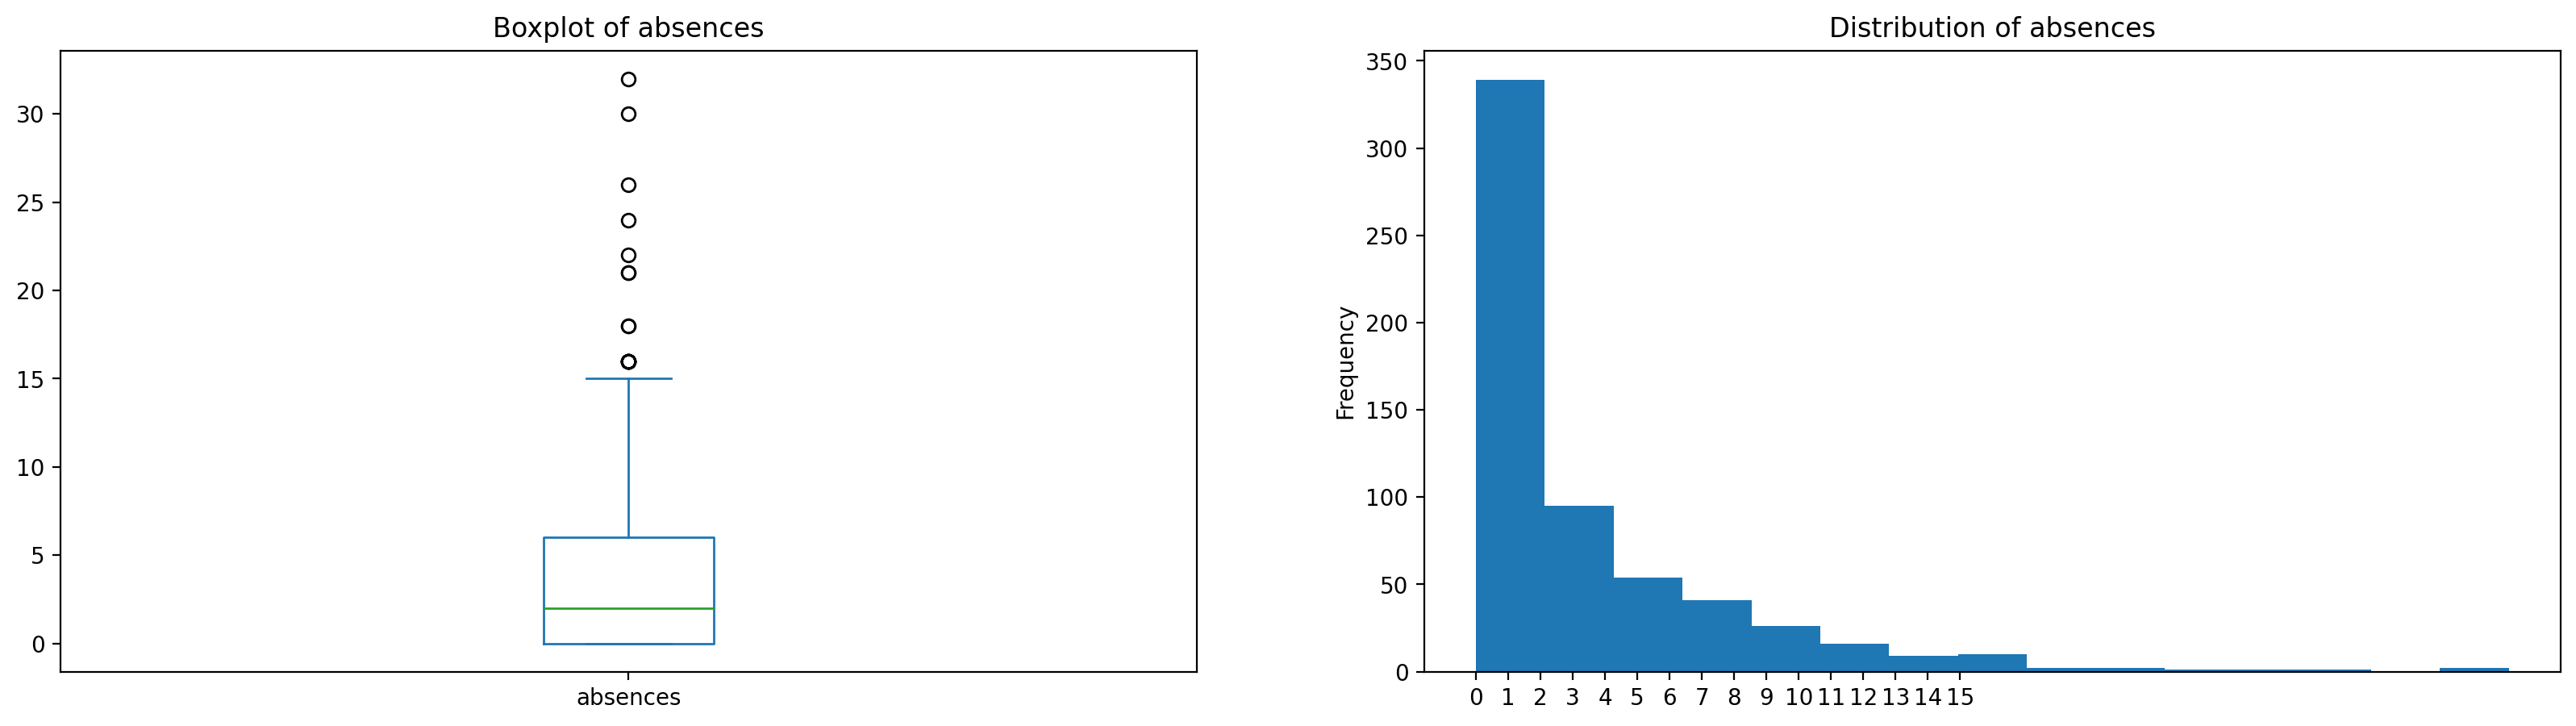

In [122]:
plot_distribution('age', 22, 15)
plot_distribution('absences', 15, 0)

It can bee seen that the age distribution has outliers for values bigger than 20. Therefore, school students with an age bigger than 20 are clustered in the age of 21 and later displayed as *>20*. For the absences the distribution has outliers for values bigger than 15. As a result the upper bound for the absences is set to 15.

In [123]:
def age_scale_df(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['age'] = df['age'].apply(lambda age: age if age <= 20 else 21)
    return df

def map_age(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['age'] = df['age'].apply(lambda age: str(age) if age <= 20 else '>20')
    return df
    
def absences_scale_df(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['absences'] = df['absences'].apply(lambda absences: absences if absences <= 15 else 16)
    return df

def map_absences(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['absences'] = df['absences'].apply(lambda absences: str(absences) if absences <= 15 else '>15')
    return df

In [124]:
temp = numerical_data.copy()
temp = age_scale_df(temp)
temp = absences_scale_df(temp)
temp = map_age(temp)
temp = map_absences(temp)
temp[['age', 'absences']].head(12)

,age,absences
0,16.0,6.0
1,18.0,0.0
2,17.0,0.0
3,18.0,0.0
4,18.0,8.0
5,16.0,0.0
6,17.0,2.0
7,16.0,4.0
8,18.0,10.0
9,18.0,0.0


#### 2.1.3 Apply all changes

In [125]:
numerical_data = grade_scale_df(numerical_data)
numerical_data = age_scale_df(numerical_data)
numerical_data = absences_scale_df(numerical_data)

### 2.1. Correlation matrix

The data is now ready for the correlation matrix. For this, the pandas function corr is used. The result is displayed as a heatmap in the colors red and green. The red color indicates a negative correlation, the green color a positive correlation. The darker the color, the stronger the correlation. The correlation matrix is displayed in the following section and can be seen in the files *correlation-matrix.png* and *correlation-matrix.xlsx* in the data folder.

In [126]:
corr_styled = numerical_data.corr().style.background_gradient(cmap='RdYlGn', axis=None).set_precision(2)
# dfi.export(corr_styled, DOC_PATH + "correlation_matrix.png", max_cols=-1)
# corr_styled.to_excel(DOC_PATH + "correlation_matrix.xlsx")
corr_styled

/tmp/ipykernel_8780/841656423.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_styled = numerical_data.corr().style.background_gradient(cmap='RdYlGn', axis=None).set_precision(2)


,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Mjob_at_home,1.00,-0.15,-0.41,-0.27,-0.19,0.14,-0.07,0.01,-0.01,-0.09,0.13,-0.08,0.07,-0.13,-0.01,-0.01,0.04,0.22,-0.14,0.08,0.17,-0.02,-0.04,-0.38,-0.21,0.19,-0.05,0.11,-0.02,-0.01,-0.01,-0.07,-0.01,-0.15,-0.24,0.04,-0.02,-0.02,-0.04,-0.02,-0.03,-0.09,-0.02,-0.18,-0.13,-0.18
Mjob_health,-0.15,1.00,-0.22,-0.15,-0.10,-0.05,0.23,-0.08,0.02,-0.01,-0.11,-0.01,0.02,0.13,0.04,-0.01,-0.05,-0.09,0.02,-0.09,-0.09,-0.01,-0.03,0.26,0.14,-0.13,-0.00,-0.05,-0.06,0.05,0.01,0.00,0.02,0.10,0.10,0.03,-0.04,-0.04,0.04,-0.09,0.01,0.01,-0.10,0.12,0.13,0.11
Mjob_other,-0.41,-0.22,1.00,-0.41,-0.29,-0.04,-0.11,0.24,-0.15,-0.10,-0.03,0.07,-0.05,0.01,0.07,-0.12,0.10,0.03,-0.02,0.05,0.05,0.07,0.02,-0.25,-0.21,0.03,-0.01,0.01,0.06,-0.11,-0.03,-0.07,-0.09,-0.03,-0.07,0.03,0.01,-0.00,0.01,-0.01,-0.04,-0.01,0.04,-0.04,-0.07,-0.05
Mjob_services,-0.27,-0.15,-0.41,1.00,-0.19,-0.02,-0.01,-0.13,0.16,0.00,-0.04,-0.02,0.00,0.07,-0.02,0.07,-0.09,-0.12,0.07,-0.04,-0.10,-0.02,0.05,0.15,0.12,-0.07,0.03,0.02,0.03,0.07,0.05,0.08,0.04,0.04,0.14,-0.07,0.04,0.00,0.05,0.06,0.04,0.06,0.07,0.05,0.03,0.05
Mjob_teacher,-0.19,-0.10,-0.29,-0.19,1.00,-0.05,0.08,-0.14,0.02,0.27,0.02,0.04,-0.03,-0.04,-0.10,0.12,-0.05,-0.11,0.11,-0.06,-0.08,-0.05,-0.02,0.46,0.33,-0.10,0.04,-0.13,-0.06,0.04,-0.00,0.10,0.10,0.11,0.15,-0.03,-0.00,0.06,-0.06,0.04,0.04,0.04,-0.04,0.13,0.13,0.15
Fjob_at_home,0.14,-0.05,-0.04,-0.02,-0.05,1.00,-0.05,-0.31,-0.17,-0.06,0.11,-0.05,-0.03,-0.06,0.01,-0.03,0.04,0.15,-0.04,0.05,-0.02,-0.04,0.00,-0.10,-0.10,-0.03,-0.01,0.03,0.02,0.05,-0.01,0.04,0.03,-0.10,-0.12,0.01,-0.08,0.05,0.01,-0.03,-0.05,-0.05,0.02,-0.11,-0.08,-0.08
Fjob_health,-0.07,0.23,-0.11,-0.01,0.08,-0.05,1.00,-0.21,-0.12,-0.04,-0.05,-0.06,0.02,0.10,0.07,-0.04,-0.05,-0.08,-0.04,-0.11,-0.09,-0.01,-0.01,0.15,0.23,-0.12,0.09,-0.06,0.09,0.11,-0.01,0.00,0.07,0.06,0.04,-0.02,0.00,-0.07,-0.01,-0.05,-0.04,0.08,-0.02,0.07,0.08,0.07
Fjob_other,0.01,-0.08,0.24,-0.13,-0.14,-0.31,-0.21,1.00,-0.71,-0.27,-0.02,0.07,-0.08,0.01,-0.14,0.07,0.10,-0.06,-0.02,0.06,0.05,-0.02,0.09,-0.13,-0.22,0.10,-0.03,0.04,-0.01,-0.06,0.01,-0.08,-0.05,-0.02,-0.00,0.01,0.02,0.03,0.03,-0.03,-0.01,0.08,0.01,-0.02,0.00,-0.01
Fjob_services,-0.01,0.02,-0.15,0.16,0.02,-0.17,-0.12,-0.71,1.00,-0.15,-0.01,-0.03,0.08,-0.02,0.10,-0.05,-0.08,0.06,0.03,-0.02,0.00,0.00,-0.11,0.01,0.03,-0.02,0.01,0.00,-0.06,-0.02,0.01,0.04,0.01,0.03,0.05,-0.02,0.06,-0.05,-0.02,0.08,0.09,-0.10,-0.01,-0.02,-0.05,-0.05
Fjob_teacher,-0.09,-0.01,-0.10,0.00,0.27,-0.06,-0.04,-0.27,-0.15,1.00,-0.02,-0.00,0.03,-0.00,0.03,0.01,-0.06,-0.10,0.06,-0.06,-0.03,0.09,0.03,0.26,0.35,-0.05,-0.02,-0.08,0.06,0.03,-0.03,0.05,-0.02,0.06,0.01,0.02,-0.06,0.04,-0.02,-0.02,-0.08,0.01,-0.01,0.15,0.14,0.14


### 2.2. Analysis of the Correlation matrix
TODO: Needs to be done

# 3. Combine columns
The current data contains a lot of columns, which may not all be needed for the Bayesian network. Therefore, some of the columns are combined to reduce the number of columns. The columns are grouped as follows:
- *schoolsup*, *paid* and *famsup* are merged to *sup*
- *Dalc* and *Walc* are merged to *alc*
- *goout* and *freetime* are merged to *social*
- *Medu* and *Fedu* are merged to *Pedu*

In [127]:
grouped = numerical_data.copy()

def group(df: pd.DataFrame) -> pd.DataFrame:
    # Support
    df['sup'] = df.apply(lambda row: row[['schoolsup', 'famsup', 'paid']].sum(), axis=1)
    df = df.drop(['schoolsup', 'famsup', 'paid'], axis=1)

    # Alcohol
    df['alc'] = df[['Walc', 'Dalc']].median(axis=1).round(0)
    df = df.drop(['Walc', 'Dalc'], axis=1)

    # Social
    df['social'] = df[['goout', 'freetime']].median(axis=1).round(0)
    df = df.drop(['goout', 'freetime'], axis=1)

    # Parent education
    df['Pedu'] = df[['Medu', 'Fedu']].median(axis=1).round(0)
    df = df.drop(['Medu', 'Fedu'], axis=1)

    # Jobs
    df['Pjob_teacher'] = df.apply(lambda row: 1. if row['Mjob_teacher'] == 1 or row['Fjob_teacher'] == 1 else 0., axis=1)
    df['Pjob_health'] = df.apply(lambda row: 1. if row['Mjob_health'] == 1 or row['Fjob_health'] == 1 else 0., axis=1)
    df['Pjob_services'] = df.apply(lambda row: 1. if row['Mjob_services'] == 1 or row['Fjob_services'] == 1 else 0., axis=1)
    df['Pjob_at_home'] = df.apply(lambda row: 1. if row['Mjob_at_home'] == 1 or row['Fjob_at_home'] == 1 else 0., axis=1)
    df['Pjob_other'] = df.apply(lambda row: 1. if row['Mjob_other'] == 1 or row['Fjob_other'] == 1 else 0., axis=1)
    df = df.drop(['Mjob_teacher', 'Fjob_teacher', 'Mjob_health', 'Fjob_health', 'Mjob_services', 'Fjob_services', 'Mjob_at_home', 'Fjob_at_home', 'Mjob_other', 'Fjob_other'], axis=1)

    return df
    
grouped = group(grouped.copy())

grouped.head()


,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,school,sex,age,address,famsize,Pstatus,traveltime,studytime,failures,activities,nursery,higher,internet,romantic,famrel,health,absences,G1,G2,G3,sup,alc,social,Pedu,Pjob_teacher,Pjob_health,Pjob_services,Pjob_at_home,Pjob_other
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,16.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,5.0,6.0,5.0,5.0,5.0,0.0,4.0,4.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,18.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,5.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,17.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,4.0,2.0,0.0,4.0,3.0,4.0,1.0,2.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,4.0,0.0,5.0,3.0,0.0,0.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,4.0,1.0,8.0,8.0,8.0,9.0,1.0,2.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0


In [128]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reason_course      599 non-null    float64
 1   reason_home        599 non-null    float64
 2   reason_other       599 non-null    float64
 3   reason_reputation  599 non-null    float64
 4   guardian_father    599 non-null    float64
 5   guardian_mother    599 non-null    float64
 6   guardian_other     599 non-null    float64
 7   school             599 non-null    float64
 8   sex                599 non-null    float64
 9   age                599 non-null    float64
 10  address            599 non-null    float64
 11  famsize            599 non-null    float64
 12  Pstatus            599 non-null    float64
 13  traveltime         599 non-null    float64
 14  studytime          599 non-null    float64
 15  failures           599 non-null    float64
 16  activities         599 non

In [129]:
grouped[['Pjob_teacher', 'Pjob_health', 'Pjob_services', 'Pjob_at_home', 'Pjob_other']].value_counts()

Pjob_teacher  Pjob_health  Pjob_services  Pjob_at_home  Pjob_other
0.0           0.0          0.0            0.0           1.0           166
                           1.0            0.0           1.0           102
                           0.0            1.0           1.0            86
                           1.0            0.0           0.0            53
                                          1.0           0.0            41
1.0           0.0          0.0            0.0           1.0            31
                           1.0            0.0           0.0            28
0.0           1.0          0.0            0.0           1.0            21
                           1.0            0.0           0.0            18
              0.0          0.0            1.0           0.0            17
1.0           0.0          0.0            0.0           0.0            15
0.0           1.0          0.0            0.0           0.0             8
1.0           1.0          0.0            0.0

## 3.1 Correlation matrix after merging
Now the correlation matrix is displayed again, but with the merged columns. The result can be seen in the files *correlation-matrix-grouped.png* and *correlation-matrix-grouped.xlsx* in the data folder.

In [130]:
corr_styled = grouped.corr().style.background_gradient(cmap='RdYlGn', axis=None).set_precision(2)
# dfi.export(corr_styled, DOC_PATH + "correlation-matrix-grouped.png", max_cols=-1)
corr_styled.to_excel(DOC_PATH + "correlation-matrix-grouped.xlsx")
corr_styled

/tmp/ipykernel_8780/3637986086.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_styled = grouped.corr().style.background_gradient(cmap='RdYlGn', axis=None).set_precision(2)


,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,school,sex,age,address,famsize,Pstatus,traveltime,studytime,failures,activities,nursery,higher,internet,romantic,famrel,health,absences,G1,G2,G3,sup,alc,social,Pedu,Pjob_teacher,Pjob_health,Pjob_services,Pjob_at_home,Pjob_other
reason_course,1.00,-0.48,-0.32,-0.48,-0.04,0.01,0.06,0.13,-0.06,0.03,0.08,0.03,-0.02,0.15,-0.07,0.15,0.00,-0.03,-0.09,-0.12,0.01,-0.03,0.11,-0.03,-0.14,-0.14,-0.12,-0.05,-0.04,0.05,-0.10,-0.02,-0.13,-0.03,0.16,-0.01
reason_home,-0.48,1.00,-0.19,-0.29,-0.03,0.01,0.03,-0.14,0.05,0.00,-0.16,-0.01,0.04,-0.14,-0.01,-0.08,-0.08,-0.04,0.06,0.07,0.00,0.01,-0.03,0.06,0.09,0.09,0.09,0.07,0.02,-0.03,0.03,0.03,-0.02,-0.02,-0.09,0.07
reason_other,-0.32,-0.19,1.00,-0.19,0.04,0.02,-0.09,0.20,0.04,-0.01,0.09,0.03,-0.06,0.05,-0.09,0.01,-0.08,0.01,-0.07,-0.04,0.03,0.01,-0.01,-0.08,-0.11,-0.10,-0.13,-0.03,0.11,-0.02,-0.03,0.02,0.02,0.05,0.04,-0.09
reason_reputation,-0.48,-0.29,-0.19,1.00,0.05,-0.03,-0.03,-0.16,-0.01,-0.03,0.01,-0.05,0.04,-0.07,0.17,-0.11,0.14,0.07,0.09,0.11,-0.04,0.02,-0.10,0.03,0.15,0.15,0.15,0.02,-0.05,-0.01,0.11,-0.03,0.16,0.02,-0.13,0.01
guardian_father,-0.04,-0.03,0.04,0.05,1.00,-0.84,-0.15,0.08,0.02,-0.13,-0.00,0.02,-0.17,0.02,0.01,-0.09,-0.02,-0.04,0.03,0.00,-0.08,0.02,-0.03,-0.09,0.08,0.06,0.06,-0.00,0.00,-0.03,-0.02,-0.05,0.06,0.05,-0.01,-0.03
guardian_mother,0.01,0.01,0.02,-0.03,-0.84,1.00,-0.41,-0.07,-0.01,-0.07,-0.02,-0.03,0.08,-0.07,-0.01,-0.05,0.04,0.09,0.09,-0.02,-0.01,0.03,0.03,-0.00,0.00,0.00,-0.00,-0.02,-0.02,0.02,0.07,0.09,-0.02,0.01,-0.01,-0.03
guardian_other,0.06,0.03,-0.09,-0.03,-0.15,-0.41,1.00,-0.01,-0.01,0.34,0.04,0.01,0.13,0.09,0.00,0.24,-0.04,-0.09,-0.21,0.02,0.15,-0.08,0.00,0.15,-0.13,-0.10,-0.09,0.05,0.03,0.03,-0.11,-0.07,-0.06,-0.11,0.05,0.11
school,0.13,-0.14,0.20,-0.16,0.08,-0.07,-0.01,1.00,-0.09,0.08,0.38,-0.02,-0.03,0.26,-0.16,0.10,-0.09,0.00,-0.12,-0.25,0.07,-0.04,-0.05,-0.16,-0.31,-0.27,-0.30,-0.10,0.04,0.05,-0.28,-0.13,-0.11,-0.01,0.26,0.02
sex,-0.06,0.05,0.04,-0.01,0.02,-0.01,-0.01,-0.09,1.00,-0.03,-0.02,-0.09,-0.08,0.03,-0.22,0.07,0.14,-0.03,-0.05,0.07,-0.10,0.10,0.13,0.02,-0.08,-0.08,-0.10,-0.10,0.32,0.11,0.12,0.11,0.02,0.07,-0.14,-0.03
age,0.03,0.00,-0.01,-0.03,-0.13,-0.07,0.34,0.08,-0.03,1.00,0.03,-0.00,0.02,0.04,-0.02,0.33,-0.06,-0.03,-0.27,-0.00,0.18,-0.05,0.00,0.17,-0.20,-0.14,-0.11,-0.16,0.14,0.06,-0.16,-0.08,-0.14,-0.03,0.09,0.05


In [131]:
grouped.loc[grouped['G3'] == 11, ['G1', 'G2', 'reason_course', 'reason_other', 'reason_home', 'school', 'failures', 'higher', 'Pjob_at_home', 'Pjob_teacher', 'Pjob_health', 'Pjob_services', 'Pjob_other', 'studytime']].describe()
grouped.loc[grouped['G3'] == 11, ['G1', 'G2', 'reason_course', 'reason_other', 'reason_home', 'school', 'failures', 'higher', 'Pjob_at_home', 'Pjob_teacher', 'Pjob_health', 'Pjob_services', 'Pjob_other', 'studytime']].value_counts()

G1    G2    reason_course  reason_other  reason_home  school  failures  higher  Pjob_at_home  Pjob_teacher  Pjob_health  Pjob_services  Pjob_other  studytime
8.0   9.0   0.0            0.0           0.0          0.0     0.0       1.0     0.0           1.0           0.0          1.0            0.0         4.0          1
9.0   10.0  1.0            0.0           0.0          0.0     0.0       1.0     0.0           1.0           0.0          0.0            0.0         1.0          1
11.0  11.0  0.0            0.0           0.0          1.0     0.0       1.0     0.0           0.0           0.0          1.0            1.0         1.0          1
                                                      0.0     0.0       1.0     0.0           1.0           0.0          0.0            0.0         2.0          1
                                                                                              0.0           1.0          1.0            0.0         4.0          1
10.0  11.0  1.0            